# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings and exploring some basic open source LLMs' applications to data.

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization
10. Large Language Models (LLMs)


### Necessary Library Requirements:

#### Same as Lab1 except PAMI:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install via `pip3 install jupyter` and use `jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install via `pip3 install scikit-learn` from a terminal
- [Pandas](http://pandas.pydata.org/)
    - Install via `pip3 install pandas` from a terminal
- [Numpy](http://www.numpy.org/)
    - Install via `pip3 install numpy` from a terminal
- [Matplotlib](https://matplotlib.org/)
    - Install via `pip3 install maplotlib` from a terminal
- [Plotly](https://plot.ly/)
    - Install via `pip3 install plotly` from a terminal
- [Seaborn](https://seaborn.pydata.org/)
    - Install via `pip3 install seaborn`
- [NLTK](http://www.nltk.org/)
    - Install via `pip3 install nltk` from a terminal
- [UMAP](https://umap-learn.readthedocs.io/en/latest/)
    - Install via `pip3 install umap-learn` from a terminal
    

#### New Libraries to install:
- [Gensim](https://pypi.org/project/gensim/)
    - Install via `pip3 install gensim`

- [tensorflow](https://www.tensorflow.org/)
    - Install via `pip3 install tensorflow`
    - Also install `pip3 install tensorflow-hub`

- [Keras](https://keras.io/)
    - Install via `pip3 install keras`

- [Ollama](https://ollama.com)
    - Install via `pip3 install ollama`

- [langchain](https://www.langchain.com)
    - Install via `pip3 install langchain`
    - Also install `pip3 install langchain_community`
    - Also install `pip3 install langchain_core`
    
- [beautifulsoup4](https://pypi.org/project/beautifulsoup4/)
    - Install via `pip3 install beautifulsoup4`
    
- [chromadb](https://www.trychroma.com)
    - Install via `pip3 install chromadb`
    
- [gradio](https://www.gradio.app)
    - Install via `pip3 install gradio`
    
#### Open-source LLMs to install:
- ollama run llama3.2
- ollama run llama3.2:1b  (optional if the first one is too big)
- ollama run llava-phi3

---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](attachment:pic0.png)

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [2]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [3]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [4]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [5]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [6]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [7]:
# include libraries
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import helpers.data_mining_helpers as dmh
import nltk
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

for train_df

In [8]:
# create unigram for frequency count
train_df['unigrams'] = train_df['text'].apply(lambda x: dmh.tokenize_text(x))
# check unigram
train_df[0:4]

,id,text,emotion,intensity,unigrams
3490,40663,"@NianticLabs .... For example, catching a gloo...",sadness,0.292,"[@, NianticLabs, ...., For, example, ,, catchi..."
2879,40052,2 applications for my dbs and still waiting. B...,sadness,0.792,"[2, applications, for, my, dbs, and, still, wa..."
2608,30604,don't put famous dex in a tweet with breezy lo...,joy,0.354,"[do, n't, put, famous, dex, in, a, tweet, with..."
1004,20147,Can we go back 2 weeks and start again ?? This...,fear,0.729,"[Can, we, go, back, 2, weeks, and, start, agai..."


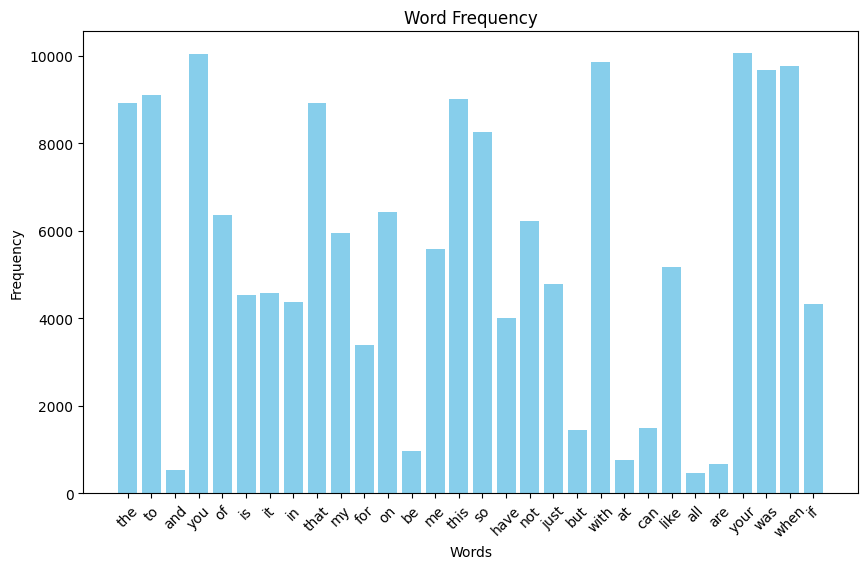

In [ ]:
count_vect = CountVectorizer()  # Initialize the CountVectorizer
train_df_counts = count_vect.fit_transform(train_df['text'])  # Transform the text data into word counts

# Get the unique words (vocabulary) from the vectorizer
words = count_vect.get_feature_names_out()

# Create a DataFrame where rows are documents and columns are words
train_term_document_df = pd.DataFrame(train_df_counts.toarray(), columns=words)

train_word_counts = train_term_document_df.sum(axis = 0).to_numpy()

# sort term frequency
sorted_indices = np.argsort(train_word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(train_word_counts)[::-1]  # Sort frequencies in descending order

# get indices of top 30
top_30_indices = sorted_indices[:30]
top_30_words = [words[i] for i in top_30_indices]

# plot the word and the frequency
plt.figure(figsize=(10, 6))
plt.bar(top_30_words, top_30_indices, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency')
plt.xticks(rotation=45)
plt.show()

for test_df

In [ ]:
test_df['unigrams'] = test_df['text'].apply(lambda x: dmh.tokenize_text(x))
test_df[0:4]

,id,text,emotion,intensity,unigrams
100,21163,“We can easily #forgive a #child who is #afrai...,fear,0.375,"[“, We, can, easily, #, forgive, a, #, child, ..."
325,40838,@GolfStrat out of Rory starts. What would your...,sadness,0.343,"[@, GolfStrat, out, of, Rory, starts, ., What,..."
46,10903,@LiamCannon1 He's just too raging to type prop...,anger,0.375,"[@, LiamCannon1, He, 's, just, too, raging, to..."
200,30829,@Casper10666 I assure you there is no laughter...,joy,0.167,"[@, Casper10666, I, assure, you, there, is, no..."


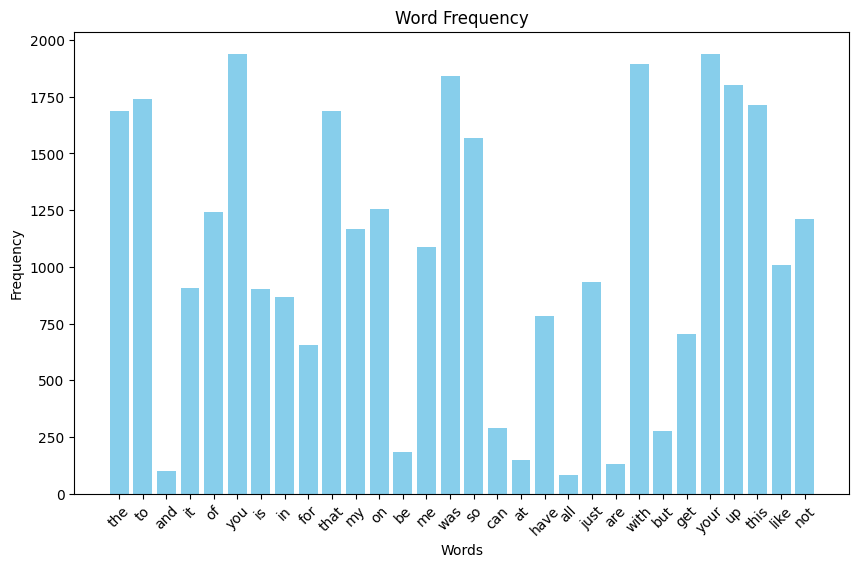

In [ ]:
count_vect = CountVectorizer()  # Initialize the CountVectorizer
test_df_counts = count_vect.fit_transform(test_df['text'])  # Transform the text data into word counts

# Get the unique words (vocabulary) from the vectorizer
words = count_vect.get_feature_names_out()

# Create a DataFrame where rows are documents and columns are words
test_term_document_df = pd.DataFrame(test_df_counts.toarray(), columns=words)

test_word_counts = test_term_document_df.sum(axis = 0).to_numpy()

# sort term frequency
sorted_indices = np.argsort(test_word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(test_word_counts)[::-1]  # Sort frequencies in descending order

# get indices of top 30
top_30_indices = sorted_indices[:30]
top_30_words = [words[i] for i in top_30_indices]

# plot the word and the frequency
plt.figure(figsize=(10, 6))
plt.bar(top_30_words, top_30_indices, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency')
plt.xticks(rotation=45)
plt.show()

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [18]:
## save to pickle file
train_df.to_pickle("train_df.pkl")
test_df.to_pickle("test_df.pkl")

In [19]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [20]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

,text
emotion,
anger,857
fear,1147
joy,823
sadness,786


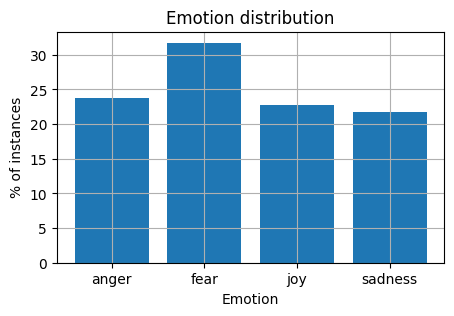

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer()

In [24]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [25]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [26]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [27]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [28]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [29]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [30]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [35]:
import nltk
nltk.download('punkt_tab')

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


(3613, 500)

In [36]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 7, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0]])

In [37]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheering', 'cheery', 'come',
       'comes', 'could', 'country', 'cry'], dtype=object)

In [38]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating the TF-IDF vectorizer with 1000 features
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(train_df['text'])

# Displaying feature names for indices 100 to 110
feature_names = vectorizer.get_feature_names_out()[100:110]
feature_names

array(['bitter', 'black', 'blacks', 'blame', 'blessed', 'blood', 'bloody',
       'blues', 'body', 'boiling'], dtype=object)

---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [39]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [40]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'sadness', 'fear', 'sadness', 'fear', 'anger', 'fear',
       'fear', 'joy', 'joy'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [41]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.66


In [42]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.62      0.71      0.67        84
        fear       0.67      0.63      0.65       110
         joy       0.74      0.67      0.70        79
     sadness       0.62      0.64      0.63        74

    accuracy                           0.66       347
   macro avg       0.66      0.66      0.66       347
weighted avg       0.66      0.66      0.66       347



In [43]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[60 11  7  6]
 [20 69  7 14]
 [ 6 11 53  9]
 [10 12  5 47]]


In [44]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

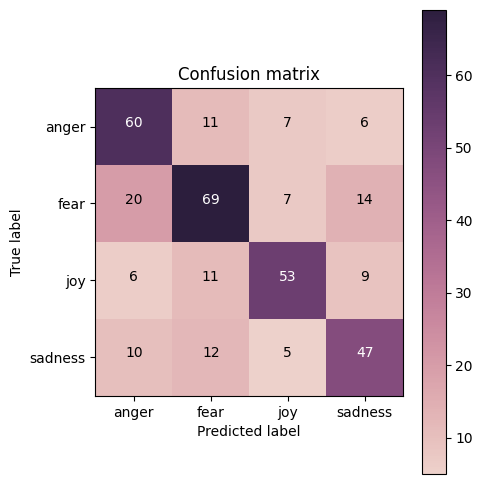

In [45]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [ ]:
# Answer here
# The results show the percentage of what kind of emotion is confused to what kind.

# The label on the left side is the result that is provided by the machine and the label
# on the bottom side is the expected result.
# The correct result is shown in the diagonal line, which goes across the upper-left to the
# bottom right.

# It is shown from the chart that the emotion "fear" has the highest accuracy, which is 76% accurate.
# The least accurate emotion is "sadness", which is only 47% accuracy.

# Among the four emotions, "anger" is mostly confused with "fear". "Fear" is mostly confused with "anger".
# "Joy" is mostly confused with "fear", but the other emotions have the similar confusion.
# "Sadness" is mostly confused with "fear".

# The result may be because "anger", "fear", "sadness" can be classified as "negative emotions".
# "Joy" is a positive emotion. Therefore, "negative emotions" group can be hardly comfused with
# "positive emotions". However, it seems that "negative emotions" are easily confused.
# That may be because when a person has "negative emotions", a lot of emotions are clogged together.
# For example, when a person gets a low score at the test, he/she may feel angry about himself/herself.
# He/she may also feel sadness, because of the low score and maybe fear of failing.

# The above is my observation for the result of the chart.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [46]:
# Answer here
# Model with only the document-term frequency data, import libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, f1_score

In [47]:
# create a CountVectorizer to convert text data into numerical features

# the vectorizer to train the multinomialNB later
vectorizer = CountVectorizer()
x_train_vec = vectorizer.fit_transform(train_df['text'])
x_test_vec = vectorizer.transform(test_df['text'])

# the 'emotion' label is the true emotion that the dataset gives.
# Consider it as the true answer.
y_train = train_df['emotion']
y_test = test_df['emotion']

In [48]:
# Train the multinomial Naive Bayes
multi_classifier = MultinomialNB()
multi_classifier.fit(x_train_vec, y_train_pred)

# make machine predict the result of x_train
y_train_pred = multi_classifier.predict(x_train_vec)

# make machine predict the result of x_test
y_test_pred = multi_classifier.predict(x_test_vec)

In [49]:
# evaluate the accuracy
# y_pred_mnb is the result, we compare it with the true result -- y_test_pred
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

# print the result
print("Multinomial Naive Bayes - Accuracy for train:", acc_train)
print("Multinomial Naive Bayes - Accuracy for test:", acc_test)

Multinomial Naive Bayes - Accuracy for train: 0.969277608635483
Multinomial Naive Bayes - Accuracy for test: 0.7636887608069164


In [50]:
# precision, recall, f1-score
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       anger       0.78      0.74      0.76        84
        fear       0.69      0.87      0.77       110
         joy       0.86      0.72      0.79        79
     sadness       0.81      0.68      0.74        74

    accuracy                           0.76       347
   macro avg       0.78      0.75      0.76       347
weighted avg       0.78      0.76      0.76       347



In [51]:
# check by confusion matrix
from sklearn.metrics import confusion_matrix

cm_m = confusion_matrix(y_test, y_test_pred)
print(cm_m)

[[62 14  4  4]
 [ 7 96  1  6]
 [ 7 13 57  2]
 [ 4 16  4 50]]


In [52]:
# functions of confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm_m, classes, title='Confusion matrix', cmap = sns.cubehelix_palette(as_cmap = True)):
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im_m = ax.imshow(cm_m, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im_m, ax=ax)
    ax.set(xticks=np.arange(cm_m.shape[1]),
           yticks=np.arange(cm_m.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm_m.max() / 2.
    for i, j in itertools.product(range(cm_m.shape[0]), range(cm_m.shape[1])):
        plt.text(j, i, format(cm_m[i, j], fmt), horizontalalignment="center", color="white" if cm_m[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

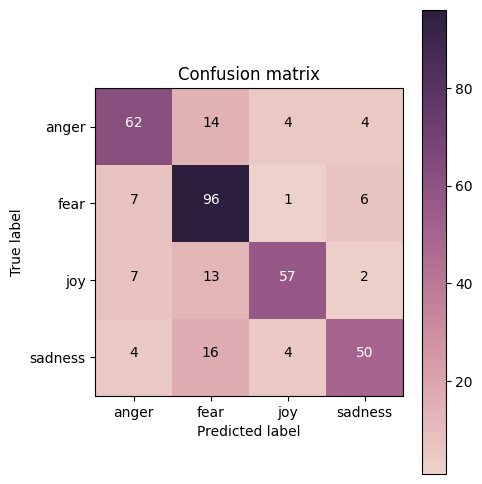

In [53]:
# plot the confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm_m, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [ ]:
# Answer here
# The observations are as follows.
# First of all, observing by accuracy, Naive Bayes model has a much higher accuracy than the Decision Tree model.
# The Naive Bayes model has a total accuracy of 77% while the Decision Tree model has a accuracy of about 68%.
# In the Naive Bayes model, 'fear' is the least confused emotion and 'sadness' is the most easily confused emotion.
# In addition, compared to the Decision Tree model, all of the emotions in the Naive Bayes model have a higher correction.

# The difference that may lead to the differences are as follows.
# First of all, decision trees tend to overfit the data. Without pruning the branches, the tree
# records tree data too well, inclusing the unimportant or nonsense features. Another problem of
# Decision trees is that uneven numbers will lead to unbalanced trees.
# It also separates the samples linearly. However, a lot of data may not be linearly separable,
# which may also lead to the result of having a lower accuracy.

# However, there are a lot of strengths of the decision tree.
# It is fast, efficient, and work for all kinds of data, both numerical and categorical,
# discrete or continuous. The most important information-based data can be shown that might not
# be visible at the first glance.

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by:
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to.

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models.

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](attachment:pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [54]:
import keras

# standardize name (X, y)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [55]:
import keras

In [56]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves.

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [57]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2167        joy
619       anger
2983    sadness
1842       fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [58]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](attachment:pic2.png)

In [59]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          32,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Softmax)                    │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

### 6.4 Train

In [60]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

FileNotFoundError: [Errno 2] No such file or directory: 'logs/training_log.csv'

### 6.5 Predict on testing data

In [ ]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[3.2795306e-05, 4.9858727e-04, 9.8326230e-01, 1.6206322e-02],
       [4.0319171e-03, 1.7254804e-05, 9.9590069e-01, 5.0179042e-05],
       [2.7719224e-08, 1.8863424e-03, 1.4827308e-05, 9.9809879e-01],
       [5.2073974e-05, 1.9591603e-06, 1.4387062e-07, 9.9994588e-01],
       [1.6881041e-04, 9.9981195e-01, 1.0542336e-06, 1.8263854e-05]],
      dtype=float32)

In [ ]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'joy', 'sadness', 'sadness', 'fear'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.67


In [61]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("/content/drive/My Drive/NTHU/DM2024-Lab2-Master/logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.380570,1.325204,0.435158,1.268106
1,1,0.652920,0.973672,0.613833,0.931222
2,2,0.793247,0.579726,0.688761,0.804705
3,3,0.844727,0.419472,0.685879,0.809215
4,4,0.880985,0.331773,0.677233,0.825995
5,5,0.908110,0.273224,0.677233,0.886005
6,6,0.926654,0.223510,0.674352,0.929192
7,7,0.939109,0.188455,0.680115,0.968626
8,8,0.946028,0.163689,0.668588,1.091248
9,9,0.956269,0.139271,0.657061,1.117140


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](attachment:pic3.png)


![pic4.png](attachment:pic4.png)

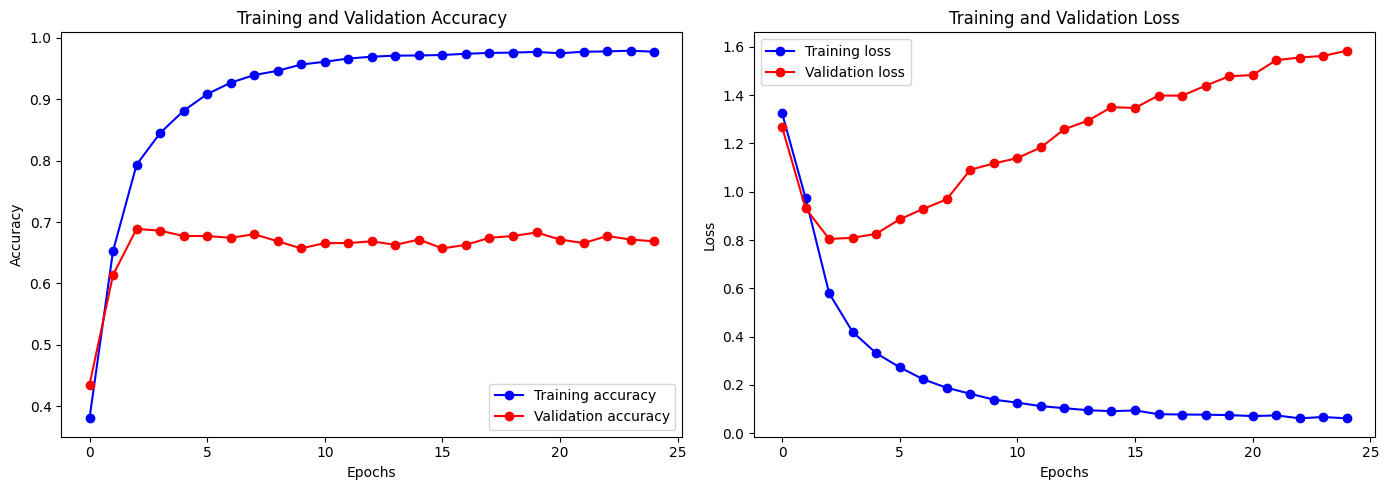

In [62]:
# Answer here
epochs = training_log['epoch']
train_acc = training_log['accuracy']
val_acc = training_log['val_accuracy']
train_loss = training_log['loss']
val_loss = training_log['val_loss']

# Plot accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [64]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
2167,30163,It's a beautiful day today. Cloudy but sunny a...,"[It, 's, a, beautiful, day, today, ., Cloudy, ..."
619,10619,i resent biting my tongue.,"[i, resent, biting, my, tongue, .]"
2983,40156,Mixed emotions. #sadness #anxietymaybe #missin...,"[Mixed, emotions, ., #, sadness, #, anxietymay..."
1842,20985,Good Morning!!!\n\n #leadership #healthcareIT ...,"[Good, Morning, !, !, !, \n\n, #, leadership, ..."
3484,40657,Been working in Blanchardstown shopping centre...,"[Been, working, in, Blanchardstown, shopping, ..."


In [65]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['It', "'s", 'a', 'beautiful', 'day', 'today', '.', 'Cloudy', 'but', 'sunny', 'and', 'breezy', '.']),
       list(['i', 'resent', 'biting', 'my', 'tongue', '.']),
       list(['Mixed', 'emotions', '.', '#', 'sadness', '#', 'anxietymaybe', '#', 'missingfriends', '#', 'growingupsucks', '#', 'lostfriends', '#', 'wheresthetruefriends', '#', 'complications'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [66]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus,
                          vector_size=vector_dim, window=window_size,
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [67]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.69271946,  0.48950103, -0.00733269, -0.18114766, -0.33407745,
       -1.1437085 ,  0.813325  ,  1.1484962 , -0.28396124, -0.46722147,
       -0.16628124, -0.7485795 , -0.38142136,  0.20363365, -0.13807537,
       -0.33598518,  0.9326048 , -0.45334914,  0.2155176 , -1.1673933 ,
        0.6418487 ,  1.0738709 ,  0.42704746,  0.30532438,  0.09281468,
        0.18039715, -0.5681678 ,  0.08315109, -0.4478036 ,  0.04416466,
        0.67697895,  0.01336448,  0.8336333 , -0.72170234, -0.13899063,
        0.8799424 ,  0.21937108, -0.06824461, -0.76757854, -0.74293274,
       -0.05990842, -0.30169538, -0.4036712 ,  0.39074042,  0.56145966,
       -0.392739  , -0.86449665,  0.10659281,  0.40797   ,  0.32519522,
       -0.08051976, -0.68004256, -0.35521576, -0.09691189, -0.70164454,
       -0.41827035,  0.14853477, -0.7616698 ,  0.03780691,  0.5361709 ,
        0.19148503, -0.3423655 ,  0.3730611 ,  0.27430043, -0.42138246,
        0.74780923,  0.37961528,  0.5375182 , -1.3859706 ,  0.53

In [68]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('Be', 0.9179497361183167),
 ('keeping', 0.9118732810020447),
 ('pls', 0.9091387987136841),
 ('Makes', 0.9029450416564941),
 ('dad', 0.9023275375366211),
 ('cats', 0.9013692140579224),
 ('.\\nA', 0.9007256627082825),
 ('help', 0.8995016813278198),
 ('wednesday', 0.8962894082069397),
 ("'you", 0.8937479257583618)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [70]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "/content/drive/My Drive/NTHU/DM2024-Lab2-Master/GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [71]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [72]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [ ]:
# Answer here
# To represent a sequence of words using word vectors, we need to transform the sequence of individual
# word embeddings into a representaion that encapsulates the sentence as a whole. There are several
# techniques we can achieve this.

# We can concatenate word vectors in the sentence when the sentence length is fixed or padded to a
# consistent size. It retains all word embeddings individually. But it may have high-dimensional
# representation and the memory is inefficient for long sentences.

# We can also pass the word vectors into Recurrent Neural Networks(RNNs)-based models such as simple RNNs,
# long short-term memory networks, gated recurrent units. It is used when the word order and context
# are critical. It can capture sequential and temporal relationships in the data.
# However, it is computationally intensive for long sequences and difficult to parallelize.

# We can also use Tranformers. Models like BERT, GPT or other custom models are good to process the
# word vectors and generate sentence representations. It is used when the context and relationships
# between all words are essential. The advantages are this is a good technique that a lot of researchers
# that research on NLP try and captures rich contextual information. However, it is computationally
# expensive as it requires lots of computing power and require large datasets for training.

# These are just some of the examples of how we can deal with the word vectors.

## 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [73]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [74]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


![pic6.png](attachment:pic6.png)

In [75]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)

In [76]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)


## 9. High-dimension Visualization: t-SNE and UMAP

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](attachment:pic7.png)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization

And also like this for UMAP:
![pic9-2.png](attachment:pic9-2.png)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
https://umap-learn.readthedocs.io/en/latest/

### 9.1 Prepare visualizing target

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [77]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.2 Plot using t-SNE and UMAP (2-dimension)

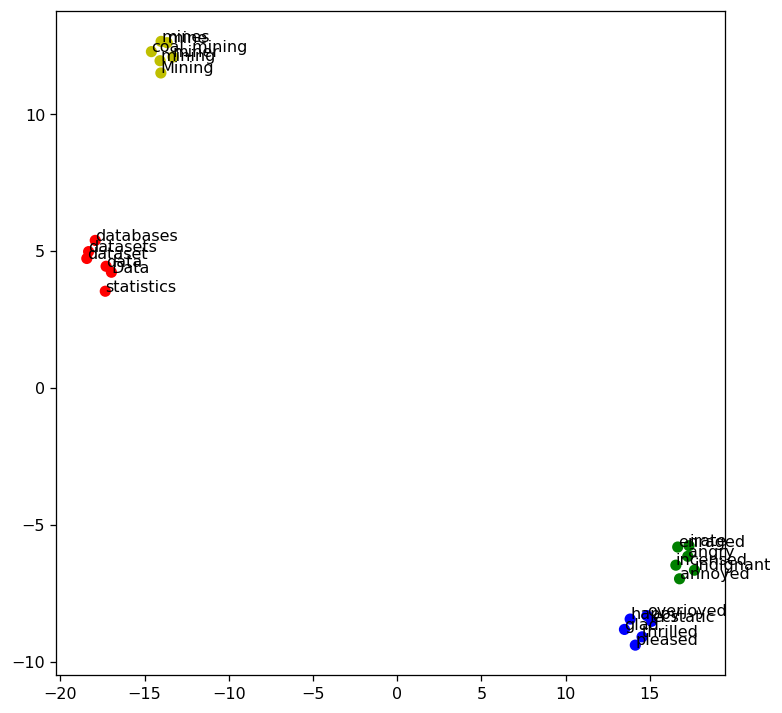

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

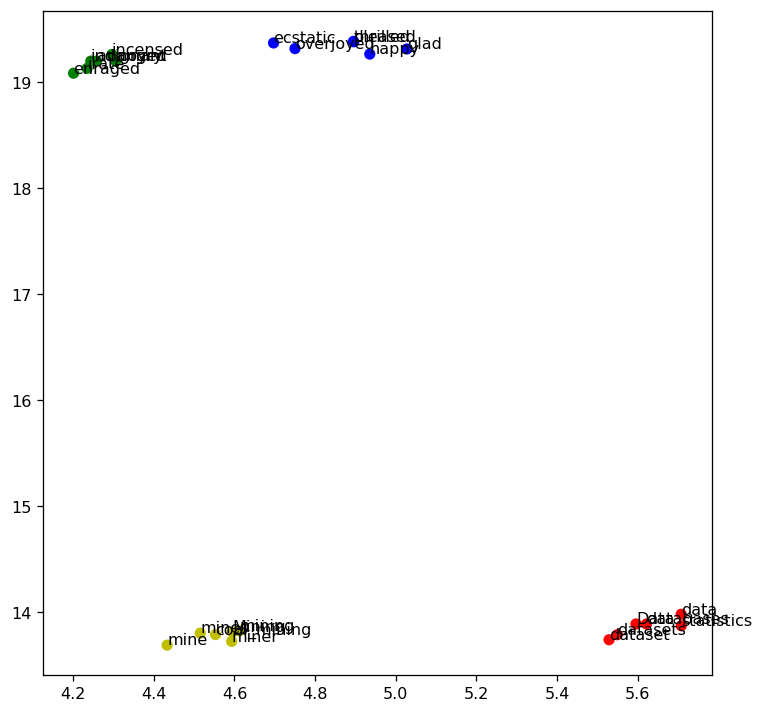

In [79]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()



### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

#### t-SNE map

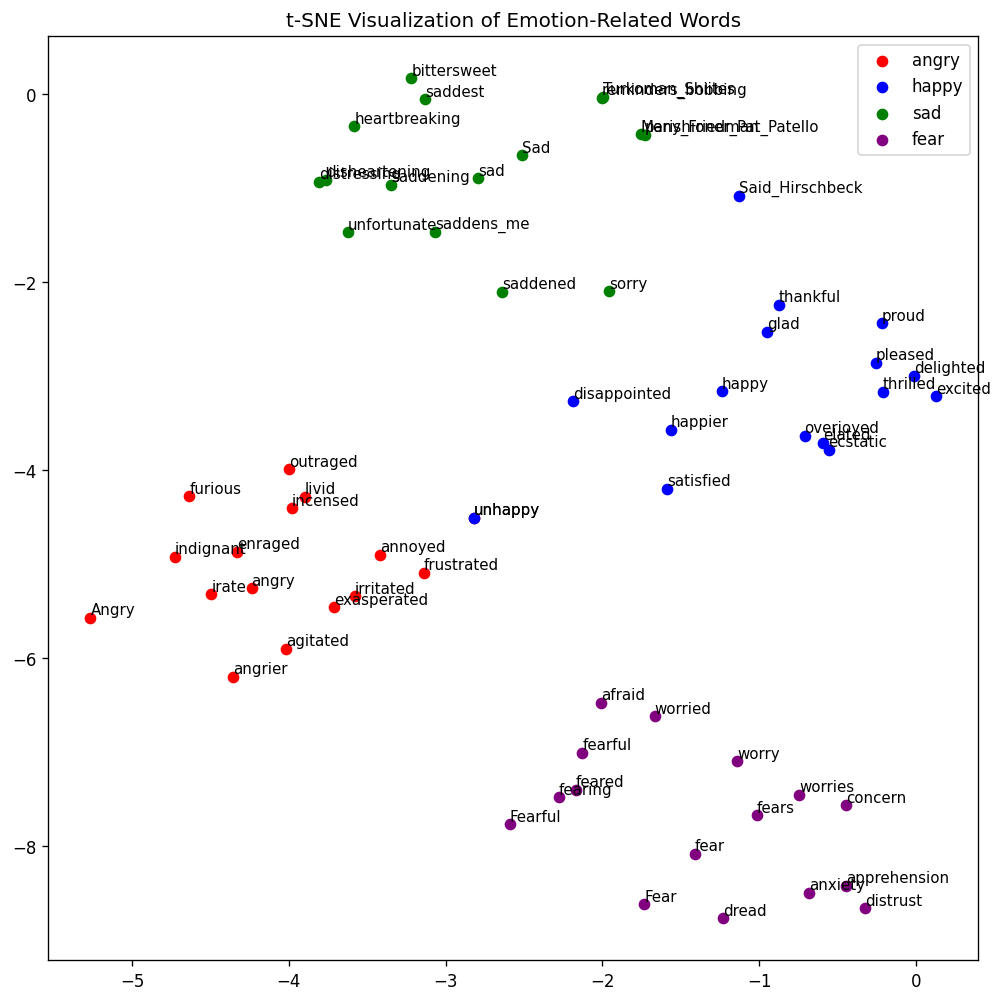

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Load your Word2Vec model (replace with your actual loaded model)
model = w2v_google_model

# Define the target emotions
emotions = ["angry", "happy", "sad", "fear"]

# Find the 15 most related words for each emotion
related_words = {}
for emotion in emotions:
    if emotion in model.index_to_key:  # Ensure the emotion is in the vocabulary
        similar_words = [word for word, _ in model.most_similar(emotion, topn=15)]
        related_words[emotion] = similar_words
    else:
        print(f"'{emotion}' is not in the vocabulary. Skipping.")

# Prepare the data for t-SNE
all_words = []
for emotion, words in related_words.items():
    all_words.append(emotion)  # Add the emotion itself
    all_words.extend(words)    # Add the related words
X_train = model[all_words]    # Get vectors for all words

# Train t-SNE
tsne = TSNE(n_components=2, metric='cosine', random_state=28)
X_tsne = tsne.fit_transform(X_train)

# Plot the results
plt.figure(figsize=(10, 10), dpi=120)
colors = ["red", "blue", "green", "purple"]  # Colors for each emotion

start_idx = 0
for i, emotion in enumerate(emotions):
    emotion_words = [emotion] + related_words.get(emotion, [])
    size = len(emotion_words)
    plt.scatter(X_tsne[start_idx:start_idx + size, 0], X_tsne[start_idx:start_idx + size, 1],
                label=emotion, color=colors[i])
    for label, x, y in zip(emotion_words, X_tsne[start_idx:start_idx + size, 0], X_tsne[start_idx:start_idx + size, 1]):
        plt.annotate(label, xy=(x, y), xytext=(0, 2), textcoords='offset points', fontsize=9)
    start_idx += size

plt.legend()
plt.title("t-SNE Visualization of Emotion-Related Words")
plt.show()


#### UMAP

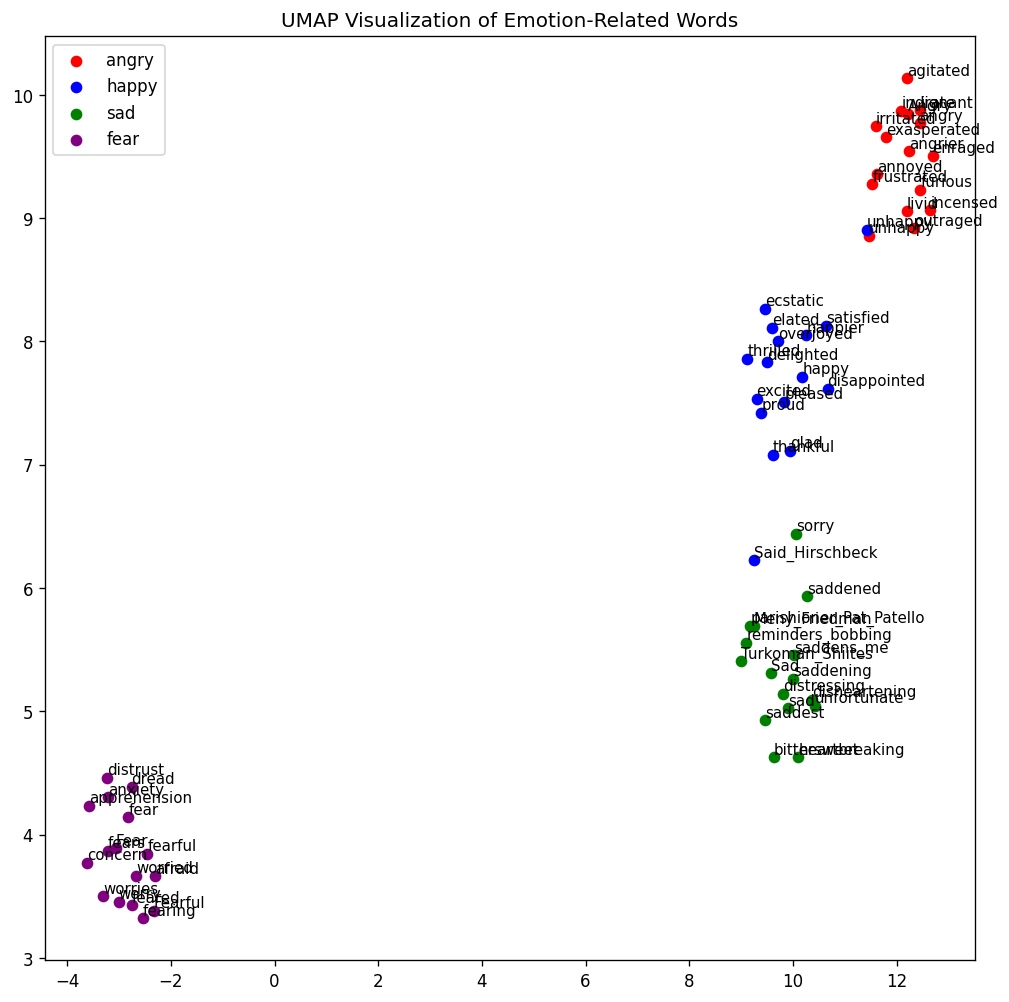

In [81]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

# Load your Word2Vec model (replace with your loaded model)
model = w2v_google_model

# Define target emotions
emotions = ["angry", "happy", "sad", "fear"]

# Find the 15 most related words for each emotion
related_words = {}
for emotion in emotions:
    if emotion in model.index_to_key:  # Ensure the word exists in the vocabulary
        similar_words = [word for word, _ in model.most_similar(emotion, topn=15)]
        related_words[emotion] = similar_words
    else:
        print(f"'{emotion}' not in vocabulary. Skipping.")

# Combine target emotions and related words into a single list
all_words = []
for emotion, words in related_words.items():
    all_words.append(emotion)  # Add the emotion itself
    all_words.extend(words)    # Add related words

# Extract word vectors
X_train = model[all_words]

# Initialize and train UMAP
umap_model = umap.UMAP(n_components=2, metric="cosine", random_state=28)
X_umap = umap_model.fit_transform(X_train)

# Plotting
plt.figure(figsize=(10, 10), dpi=120)
colors = ["red", "blue", "green", "purple"]  # Assign a color to each emotion

start_idx = 0
for i, emotion in enumerate(emotions):
    emotion_words = [emotion] + related_words.get(emotion, [])
    size = len(emotion_words)
    plt.scatter(X_umap[start_idx:start_idx + size, 0], X_umap[start_idx:start_idx + size, 1],
                label=emotion, color=colors[i])
    for label, x, y in zip(emotion_words, X_umap[start_idx:start_idx + size, 0], X_umap[start_idx:start_idx + size, 1]):
        plt.annotate(label, xy=(x, y), xytext=(0, 2), textcoords="offset points", fontsize=9)
    start_idx += size

plt.legend()
plt.title("UMAP Visualization of Emotion-Related Words")
plt.show()


In [ ]:
# My answer of the comparison

# Starting from the sparsity of the two models, I would say that t-SNE graph generates a much
# more sparse graph. As for UMAP, the elements that are similar to each other tend to be put together.
# In the UMAP, we can see that the words are separate into four groups according to the color. However,
# in t-SNE, the group separation is not so obvious.

# Another interesting thing is the choice of location to put the elements. In t-SNE map, we can see that
# the choice of the emotion "sad" is put to the top of the chart. The emotion "happy" is on the right part
# of the chart. The emotion "fear" is put to the bottom and the emotion "angry" is put to the left.

# However, in UMAP, "angry" is put to the upper left, "sad" is put to the bottom left, "fear" is put to the
# upper right. What is interesting is the choice of putting "happy". It is put to the bottom left, higher than
# "sad" only a bit.

# What is almost the same is the choice of the words. Some of them are reasonable, while some of them seem to be
# ridiculous. Examples are reasonable such as "frustrated" is categorized into the "angry category".
# Examples that are unreasonable are like, "unhappy" in the "happy" category. However, it seems that the UMAP has found
# it unreasonable since the location is much more closer to "angry" than to "happy". There are also some words that
# are unrecognizable, it may be some curse words, metaphors or slang words that are not usually seen in English textbooks.
# Or it may be the bad choice of examples, like some people often write angry emails. I think that may also be
# categorized into "angry".

## 10. Large Language Models (LLMs)
Large Language Models (LLMs) are AI models trained on vast text data to understand and generate human language. Models like GPT and BERT excel at tasks like translation, summarization, and sentiment analysis due to their deep learning techniques and large-scale training. Recently these models got popular with the rise of Open-AI's ChatGPT and their different models, showcasing the potential of these models in a lot of aspects of our current society.

Open-source LLMs are cost-effective and customizable, with strong community support, but may underperform compared to paid models and require technical expertise to manage. Paid LLMs offer superior performance, ease of use, and regular updates, but are costly, less flexible, and create dependency on external providers for ongoing access and updates.

#### Open Source LLMs:
In this lab we are going to use Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)), that is a library that let us use a long list of open-source LLMs of differing size. For this section we are going to be using **'llama3.2'** or **'llama3.2:1b'** for **text based tasks**, and **'llava-phi3'** for **multi-modal tasks** (e.g. image to text). Ollama has a great variety of models, and those can be found here: [model library](https://ollama.com/library). You are free to explore them if you want to try using them, you can check the advantages and disadvantages of each.

Or they can also be observed in here:
![pic10.png](attachment:pic10.png)

In the previous image we can observe that all LLMs have something called parameters, these are the internal weights that the model learns during training, helping it understand and generate language. The more a model has, the more complex and accurate it can be, but it also needs more memory to run.

For example:

Models with **7 billion parameters** need at least **8 GB of VRAM**.
**13 billion parameters** require **16 GB of VRAM**.
**33 billion parameters** need **32 GB of VRAM**.
The higher the number of parameters, the more memory and computational power the model needs to function efficiently.

And so that is why we are trying to use small LLMs for this practice, because they require a lot of computational resources, so by using 'llama3.2' and 'llava-phi3', both models with 3 billion parameters, we will only use at most 8 GB of VRAM. But if there are some issues with 'llama3.2' we can still use 'llama3.2:1b' the model with 1 billion parameters that requires less resources.

So now let's talk about the models:
**LLaMA 3.2** is part of the LLaMA series (Large Language Model Meta AI), designed to provide efficient language understanding and generation. Despite having fewer parameters than some larger models, it offers strong performance in NLP tasks, making it suitable for scenarios where both accuracy and resource efficiency are important.

**LLaVA** (Large Language and Vision Assistant) models, like **LLaVA-Phi3** are multimodal models combining language and vision capabilities. It can interpret visual inputs like images and generate corresponding text, making it ideal for tasks that require both visual understanding and language generation, such as image captioning and answering visual-based questions.

**I will be using the llama3.2 model going onwards, you can change it for the smallest version if it is necessary for you, or you can try to run it on Kaggle where you can use online GPU resources for it.**

### 10.1 Text Prompting
Like with ChatGPT we can use these models to ask about anything. Here we are going to ask a question and then ask it to return it in markdown format to make it look better afterwards.

In [ ]:
import ollama
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'user',
        'content': 'What is data mining? (in markdown format)'
    },
])

print(response['message']['content'])

# Data Mining

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various algorithms and techniques to identify hidden gems or valuable information within the data.

## Key Characteristics of Data Mining

*   **Exploratory**: Data mining is often used to explore and discover new information in a dataset.
*   **Pattern-based**: Data mining focuses on identifying patterns, relationships, and anomalies in the data.
*   **Automated**: Data mining involves using algorithms and techniques to automate the discovery process.
*   **Large-scale datasets**: Data mining typically deals with large, complex datasets.

## Types of Data Mining

1.  **Supervised Learning**: The algorithm is trained on labeled data to learn patterns and relationships.
2.  **Unsupervised Learning**: The algorithm is applied to unlabeled data to identify patterns and clusters.
3.  **Semi-supervised Learning**: A combination of labeled and un

**We can use the IPython library to make the response look better:**

In [83]:
from IPython.display import display, Markdown, Latex
display(Markdown('*some markdown* $\phi$'))

*some markdown* $\phi$

In [ ]:
display(Markdown(response['message']['content']))

# Data Mining
================

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various algorithms and techniques to identify hidden gems or valuable information within the data.

## Key Characteristics of Data Mining

*   **Exploratory**: Data mining is often used to explore and discover new information in a dataset.
*   **Pattern-based**: Data mining focuses on identifying patterns, relationships, and anomalies in the data.
*   **Automated**: Data mining involves using algorithms and techniques to automate the discovery process.
*   **Large-scale datasets**: Data mining typically deals with large, complex datasets.

## Types of Data Mining

1.  **Supervised Learning**: The algorithm is trained on labeled data to learn patterns and relationships.
2.  **Unsupervised Learning**: The algorithm is applied to unlabeled data to identify patterns and clusters.
3.  **Semi-supervised Learning**: A combination of labeled and unlabeled data is used to improve the accuracy of the model.

## Techniques Used in Data Mining

*   **Association Rule Mining**: Identifies relationships between items in a dataset.
*   **Clustering**: Groups similar items or patterns together.
*   **Decision Trees**: Builds decision-making models based on the data.
*   **Neural Networks**: Trains neural networks to recognize patterns and make predictions.

## Applications of Data Mining

*   **Customer Segmentation**: Identifies unique customer groups based on behavior and demographics.
*   **Predictive Analytics**: Forecasts future events or trends using historical data.
*   **Anomaly Detection**: Identifies unusual patterns or outliers in the data.
*   **Marketing Automation**: Personalizes marketing campaigns and recommendations based on individual preferences.

## Benefits of Data Mining

*   **Improved Decision-Making**: Provides insights that inform business decisions.
*   **Increased Efficiency**: Automates manual processes and reduces errors.
*   **Enhanced Customer Experience**: Offers personalized experiences and tailored products.
*   **Competitive Advantage**: Gains a competitive edge through data-driven insights.


### ** >>> Exercise 9 (Take home): **  

You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.

In [ ]:
# Answer here

# The roles of the function can be "user", "assistant" or "system".

# System role
# Usually, it is the first message, that indicates the command we want to make to LLM.
# Some examples are: “Act like someone”, “Echo all my messages”, and “Translate my messages to Portuguese”.

# User role
# Indicate the message that the user (us) sends to the LLM. Some examples are: “Hi how are you doing” and “Can you teach me about the universe?”

# Assistant role
# Indicate the message that the assistant (the LLM) sends to the User.

In [ ]:
# Lets command the AI to translate my problems to Chinese and print it out
import ollama
response = ollama.chat(model='llama3.2', messages=[
    {'role':"system", 'content':"Translate my messages into Chinese with Traditional Characters"},
    {'role':"user", 'content':"Hey how are you doing?"},
    {'role':"user", 'content':"It is raining today."},
])

print(response['message']['content'])

我是如何的。今天下雨了。

(Note: I translated "Hey" to "" which is a more formal greeting in Chinese. If you want to use a more casual version, it would be "" instead.) 

Also, I used the word "" (xià tiān) for "raining today", but if you only know it's raining, a more common way to say it would be "" (yě).


In [ ]:
# OMG the translation is a disaster. It cannot show traditional Chinese words in notes.

### 10.2 Multi-Modal Prompting - Text + Images
Multi-modal prompting involves using input from multiple sources or modes, such as text, images, or audio, to guide a model's response. It allows AI to process and generate information based on more than one type of input.

For image plus text prompting, the model receives both an image and a related text prompt. The image provides visual context, while the text gives additional guidance. The model uses both inputs to generate more accurate and contextually relevant responses, which is useful for tasks like image captioning, visual question answering, or content generation based on visual cues.

Let's look at the following images that are in the **pics** folder in the directory of this notebook:

![example1.png](attachment:example1.png)
source: https://cooljapan-videos.com/tw/articles/epe0y86g

![example2.jpg](attachment:example2.jpg)
source: https://www.istockphoto.com/photo/young-cat-scottish-straight-gm1098182434-294927481

We will use the **llava-phi3** model that we installed to request a description of the images:

In [ ]:
import ollama
response2 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/example1.png'] #Image with the dog
    },
])

display(Markdown(response2['message']['content']))

The image showcases a **Shiba Inu dog** in mid-air, full of energy and excitement. The dog's fur is predominantly orange with white markings on its face and legs, giving it a unique and vibrant appearance. Its tail is curled upwards, adding to the sense of motion in the image.

The Shiba Inu is captured in various stages of jumping over a grassy area, with all four paws off the ground, emphasizing its agility and athleticism. The background of the image is blurred, suggesting a depth of field effect from the camera focusing on the dog. However, one can discern that there are trees and a white fence in the distance, providing a serene backdrop to this dynamic scene.

The image does not contain any text or other objects. The relative position of the dog suggests it has jumped over something off-frame, adding an element of mystery to the image. The overall composition focuses on the dog's action and movement, making it a captivating snapshot of this lively breed in its natural environment.

In [ ]:
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/example2.jpg'] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))

In the center of a white background, a gray tabby cat stands on its hind legs. The cat's tail is raised high in the air and it holds its front paws up, as if reaching for something above. Its ears are perked up, indicating alertness, and its eyes are focused directly at the camera, giving us a clear view of its features. The cat appears to be standing on all fours but has extended its body slightly forward, creating an unusual stance that seems both curious and playful. The contrast between the gray tabby pattern and the white background makes the cat stand out in this image.


### ** >>> Exercise 10 (Take home): **  

Try asking the model with one image of your choosing. Is the description accurate? Why?

In [ ]:
# Answer here
import ollama
response4 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/example3.jpg'] #Image with a Taiwan Blue Magpie
    },
])

display(Markdown(response4['message']['content']))

This image captures a moment of tranquility in nature. At the center of the frame, a **blue and black bird** with vibrant **red legs** is perched confidently on a **brown branch**. The bird's wings are slightly spread, perhaps preparing for flight or simply enjoying its rest.

On the right side of the branch, near the bird, there's an unexpected companion - a **red apple** with a small stem and leaf attached to it. This could suggest that our feathered friend has found a snack while taking a break from flying.

The background is a blur of greenery, suggesting that this scene takes place in a lush environment. The bird, branch, and apple are the main subjects here, creating an image that's both dynamic and serene.

In [ ]:
# The description is quite interesting.
# It clearly describes the bird, the branch and the background. I think that the
# description has point it out, which is good for a description. It also points out
# what is the bird may be doing.

# However, I think that there are some flaws in the description. According to the examples above,
# the model sometimes can distinguish the kind of the animal in the picture is. However, in this
# picture, it seems that the model cannot distinguish the "Taiwan Blue Magpie".

# In this description, the "Taiwan Blue Magpie" is described as a blue and black bird, which can
# be seen as accurate. However, it did not describe the color of the wings, which is white.

# Another thing is that the "red apple", though the color looks alike, I consider the "apple"
# as a permission, since the color of it is orange. Also, the connecting part of the fruit and
# the stem seems to be a four-leafed shaped. However, a apple does not have a connecting part
# that looks "four-leafed". In this case, I consider that it should be a permission.

# In conclusion, I think that the description is fine for pointing out the main elements, which
# can help people to have a quick analysis on the picture. However, if the person wants to know
# more about what the picture is talking about or learn about the details, he/she must do some
# research.

#### The picture
<img title="a Taiwanese Blue Magpie" alt="Alt text" src="./pics/example3.jpg">

### 10.3 Retrieval-Augmented Generation (RAG)
RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (e.g., Llama3.2). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In [84]:
import ollama
import bs4
import os
os.environ['USER_AGENT'] = 'myagent'
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

llm_model = "llama3.2" #You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict()
    )
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()

url="https://www.ibm.com/topics/large-language-models"
# Create the retriever
retriever = load_and_retrieve_docs(url)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Use the RAG chain
result = rag_chain("What are the related solutions of IBM with LLMs?")
display(Markdown(result))

The related solutions of IBM with LLMs are:

1. Watsonx Assistant: This is an AI-powered chatbot platform that uses IBM's Granite model series as its generative AI backbone.
2. Watsonx Orchestrate: This is another product from IBM that utilizes the Granite model series for generating and processing natural language data.

These solutions demonstrate IBM's commitment to leveraging LLMs to enhance its AI capabilities and provide innovative solutions for businesses and organizations.


### **Actual content in the URL:**
![pic11.png](attachment:pic11.png)

source: https://www.ibm.com/topics/large-language-models



### ** >>> Exercise 11 (Take home): **  

Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.

In [95]:
# Answer here
import ollama
import os
os.environ['USER_AGENT'] = 'myagent'
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings

llm_model = "llama3.2"  # You can change this to a preferred model

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(urls_or_texts):
    docs = []
    for item in urls_or_texts:
        if item.startswith("http"):  # If it's a URL
            loader = WebBaseLoader(web_paths=(item,), bs_kwargs=dict())
            docs.extend(loader.load())
        else:  # If it's a plain text document
            docs.append({"page_content": item, "metadata": {"source": "text"}})

    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
    splits = text_splitter.split_documents(docs)

    embeddings = OllamaEmbeddings(model=llm_model)
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)
    return vectorstore.as_retriever()

# Accept multiple URLs or text documents
urls_or_texts = [
    "https://www.ibm.com/topics/large-language-models",
    "https://en.wikipedia.org/wiki/Natural_language_processing",
    "https://www.openai.com/dall-e"
]

# Create the retriever
retriever = load_and_retrieve_docs(urls_or_texts)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)  # Format retrieved docs

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Testing the modified RAG system
questions = [
    "What are IBM's contributions to large language models?",
    "What is tokenization in natural language processing?",
    "What is the purpose of OpenAI's DALL-E?"
]

# Collecting results
results = []
for question in questions:
    result = rag_chain(question)
    results.append(result)
    print(f"Question: {question}\nResponse:\n{result}\n")


Question: What are IBM's contributions to large language models?
Response:
IBM's contributions to large language models include:

1. Early successes in statistical methods for natural language processing (NLP), particularly in machine translation, dating back to the 1990s.
2. Development of IBM alignment models, which utilized multilingual textual corpora and demonstrated potential for improving NLP systems.
3. Research into methods for learning from limited amounts of data, an area that has continued to be relevant in the development of large language models.

These contributions highlight IBM's ongoing investment in NLP and machine learning research, which has laid the groundwork for the more recent advancements in large language models.

Question: What is tokenization in natural language processing?
Response:
Tokenization in natural language processing (NLP) refers to the process of dividing text into individual words or word fragments, resulting in a word index and tokenized text. 

In [ ]:
# I think the answer is somehow accurate.

# According to the website on the first question, the answer will be "IBM has also recently
# launched its Granite model series on watsonx.ai, which has become the generative
# AI backbone for other IBM products like watsonx Assistant and watsonx Orchestrate.",
# "However, many companies, including IBM, have spent years implementing LLMs at different levels
# to enhance their natural language understanding (NLU) and natural language processing (NLP) capabilities."
# The AI successfully wrote down the answer and collect it into a small paragraph and give out a small
# conclusion on it own.

# According to the website on the second question. The answer will be "Tokenization is a process used in text
# analysis that divides text into individual words or word fragments. This technique results in two key components:
# a word index and tokenized text. The word index is a list that maps unique words to specific numerical identifiers,
# and the tokenized text replaces each word with its corresponding numerical token.
# These numerical tokens are then used in various deep learning methods."
# The examples in the website can also be written into the answer.
# By the answer given by the AI, it has also make some recognition on "speech". However, I think that
# we should separate the "word" and the "speech". Maybe my thoughts are wrong, but I think this is the
# best way to describe "tokenization".

# According to the websitr of the third question. I will write the answer as "DALL·E is a 12-billion parameter version
# of GPT-3 trained to generate images from text descriptions, using a dataset of text–image pairs."
# It did not mention the keyword "purpose" in the paragraph. However, humans can distinguish the purpose
# through "human language". In this case, I consider the question as: What does DALL·E do? So that is
# why I will give such answer.
# The answer from AI is similar to my answer. It also mentions that although the website did not mention
# the "purpose", it can be known from the website that ...... . It means that AI can somehow know about
# why is going on in human language. However, I think that the next paragraph AI generates is a little
# bit redundant. I think that when I ask about DALL-E, I don't need a response about OpenAI.

# In conclusion, I think that AI is a good tool to help go though a huge number of paper or text when
# time is not enough. However, when it comes to thinking, humans still probably need to do the job.

### 10.4 Generating LLM Embeddings:
LLM embeddings are dense vector representations of text generated by Large Language Models. These embeddings, like we have already seen in the lab, capture the semantic meaning and relationships between words, phrases, or even entire documents by mapping them into a high-dimensional space where similar pieces of text are placed closer together. What makes LLM embeddings special is that they are contextual and rich in meaning, meaning the same word can have different embeddings based on its surrounding context.

For example, the word **"bank"** would have different embeddings in the sentences **"I sat by the river bank"** and **"I deposited money in the bank."** This ability to understand and encode context enables LLM embeddings to outperform traditional techniques (like TF-IDF or one-hot encoding) by providing a deeper, more nuanced representation of language.

Additionally, LLM embeddings are pre-trained on vast amounts of data, allowing them to generalize well across different tasks (like classification, clustering, or similarity detection) without the need for extensive retraining. This makes them highly valuable in many natural language processing tasks today.

**Now let's generate some embeddings with llama 3.2 for our dataset:**

In [96]:
import pandas as pd
import ollama
import numpy as np

# Let's copy our dataframes for training and testing
df_train = train_df
df_test = test_df
# Define a function to generate embeddings
def generate_embeddings(row,text_column_name='text'):
    embeddings = ollama.embeddings(
        model='llama3.2',
        prompt=row[text_column_name],
    )
    return embeddings["embedding"]

In [97]:
# We use the text column
column_name = 'text'

# Apply the function to the specified column and store the result in a new column 'embeddings'
df_train['embeddings'] = df_train.apply(lambda row: generate_embeddings(row, column_name), axis=1) # extermely slow!!!!




In [98]:
df_test['embeddings'] = df_test.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [99]:
df_train #We can see the new column with the embeddings

,id,text,emotion,intensity,embeddings,text_tokenized
2167,30163,It's a beautiful day today. Cloudy but sunny a...,joy,0.673,"[0.07073338329792023, 0.9695496559143066, -2.5...","[It, 's, a, beautiful, day, today, ., Cloudy, ..."
619,10619,i resent biting my tongue.,anger,0.396,"[-2.115237236022949, -0.42111602425575256, 0.4...","[i, resent, biting, my, tongue, .]"
2983,40156,Mixed emotions. #sadness #anxietymaybe #missin...,sadness,0.667,"[-1.8072503805160522, 2.137260675430298, 0.544...","[Mixed, emotions, ., #, sadness, #, anxietymay..."
1842,20985,Good Morning!!!\n\n #leadership #healthcareIT ...,fear,0.271,"[-1.956445574760437, 1.2307062149047852, 2.340...","[Good, Morning, !, !, !, \n\n, #, leadership, ..."
3484,40657,Been working in Blanchardstown shopping centre...,sadness,0.292,"[0.17160862684249878, -0.4212864637374878, 0.2...","[Been, working, in, Blanchardstown, shopping, ..."
...,...,...,...,...,...,...
520,10520,@AuntieSupreme @KimberlyCarole y'all found me ...,anger,0.438,"[-0.3253769278526306, 2.1181559562683105, 1.51...","[@, AuntieSupreme, @, KimberlyCarole, y'all, f..."
727,10727,@lethargytyler ehhh I guess. I want to everyon...,anger,0.333,"[0.3870168626308441, -0.04718273878097534, 1.1...","[@, lethargytyler, ehhh, I, guess, ., I, want,..."
2488,30484,Possible magazines over against put with versu...,joy,0.440,"[-0.6445856094360352, -0.13661041855812073, -0...","[Possible, magazines, over, against, put, with..."
2723,30719,@EducatedNPetty white pricks that were laughin...,joy,0.250,"[-0.7153236269950867, -0.31229686737060547, 2....","[@, EducatedNPetty, white, pricks, that, were,..."


In [12]:
df_test #We can see the new column with the embeddings

,id,text,emotion,intensity,embeddings
21,10878,Literally fuming fuck sake,anger,0.860,"[-1.7383878231048584, 1.1524885892868042, 3.41..."
268,30897,It feels good to get outside for a minute and ...,joy,0.580,"[-1.211135745048523, 0.30285730957984924, -0.5..."
154,21217,@RyanAbe awe yay thank god I was so worried.,fear,0.500,"[-0.8305317163467407, 0.4003870487213135, -0.3..."
315,40828,Don't depress yourself by comparing yourself. ...,sadness,0.438,"[-0.9928292036056519, 1.708359956741333, -0.67..."
151,21214,I want to be a woman who #overcomes obstacles ...,fear,0.312,"[-2.6455867290496826, 0.537350058555603, 4.816..."
...,...,...,...,...,...
57,10914,@SSheil coincidentally watched Ulzana's Raid l...,anger,0.542,"[2.2593579292297363, 0.8567362427711487, -4.76..."
73,10930,@HomeSwapperteam Spent months arranging swap ...,anger,0.667,"[-0.4894528388977051, 1.386547327041626, 2.507..."
261,30890,A lifetime of laughter at the expense of the d...,joy,0.354,"[0.10617052018642426, -0.22235658764839172, 3...."
313,40826,@LeePorter94 @DomMcGovern_ hi Dom I saw u at N...,sadness,0.312,"[0.2044893354177475, 0.9356158375740051, 2.232..."


Now let's train some models with these embeddings:

**KNeighborsClassifier (KNN)**: KNN is a simple, instance-based machine learning algorithm used for classification. It works by finding the 'k' nearest neighbors to a data point based on a distance metric (e.g., Euclidean distance) and assigning the most common class among those neighbors to the data point. KNN is non-parametric, meaning it doesn’t assume a specific form for the underlying data distribution, and it classifies points based on their similarity to other points in the training set. It's easy to understand and implement, though it can become computationally expensive with large datasets.

In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Let's use the new Llama 3.2 embeddings as our training features and the emotions as our labels
X_train = df_train["embeddings"].tolist()
y_train = df_train['emotion']


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [101]:
len(df_train["embeddings"][0]) # Llama 3.2 embedding dimension is 3072

3072

In [102]:
X_test = df_test["embeddings"].tolist()
y_test = df_test['emotion']

# Predicting the label for the test data
y_pred = knn.predict(X_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'KNN Accuracy: {accuracy}')

KNN Accuracy: 0.45821325648414984


In [103]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

       anger       0.39      0.44      0.42        84
        fear       0.54      0.55      0.54       110
         joy       0.41      0.43      0.42        79
     sadness       0.47      0.38      0.42        74

    accuracy                           0.46       347
   macro avg       0.45      0.45      0.45       347
weighted avg       0.46      0.46      0.46       347



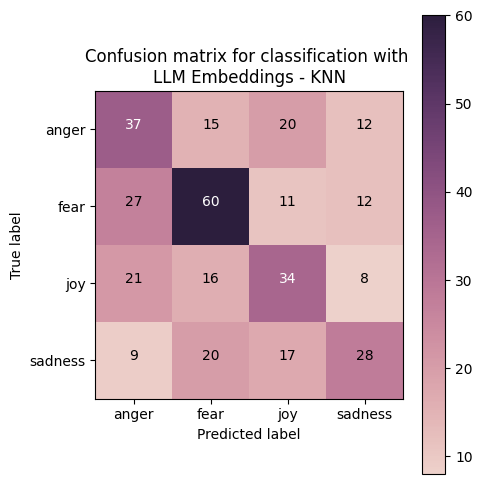

In [104]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_test, y_pred)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm2, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - KNN')

Now let's also try to apply our **Neural Network** to these embeddings:

In [105]:
X_llama_train = np.vstack(df_train["embeddings"].to_numpy()) #Defining our train set

In [106]:
X_llama_test = np.vstack(df_test["embeddings"].to_numpy()) #Defining our test set

In [88]:
X_llama_train.shape #(Number of data, Llama 3.2 embedding size)

(3613, 3072)

In [107]:
X_llama_test.shape #(Number of data, Llama 3.2 embedding size)

(347, 3072)

In [108]:
#One-hot encoding our labels
y_train_llama = label_encode(label_encoder, y_train)
y_test_llama = label_encode(label_encoder, y_test)

In [109]:
# I/O check
input_shape_llama = len(X_llama_train[0])
print('input_shape: ', input_shape_llama)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  3072
output_shape:  4


In [110]:
#We try the same Neural Network Model Again
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape_llama, ))  # 3072
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary() #We can notice that our parameter numbers went up because of the increase in the dimension of our input

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_5 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_2 (Softmax)                  │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,092 (785.52 KB)

 Trainable params: 201,092 (785.52 KB)

 Non-trainable params: 0 (0.00 B)

In [112]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('/content/drive/My Drive/NTHU/DM2024-Lab2-Master/logs/training_log_2.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_llama_train, y_train_llama,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_llama_test, y_test_llama))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.4149 - loss: 1.3412 - val_accuracy: 0.5418 - val_loss: 1.1140
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6594 - loss: 0.8695 - val_accuracy: 0.5677 - val_loss: 1.0300
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7320 - loss: 0.6876 - val_accuracy: 0.5735 - val_loss: 1.0916
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7959 - loss: 0.5416 - val_accuracy: 0.5648 - val_loss: 1.1520
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8265 - loss: 0.4541 - val_accuracy: 0.5879 - val_loss: 1.2901
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8759 - loss: 0.3561 - val_accuracy: 0.5764 - val_loss: 1.3113
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8969 - loss: 0.2985 - val_accuracy: 0.5533 - val_loss: 1.4672
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9017 - loss: 0.2718 - val_accuracy: 0

In [113]:
## predict
pred_result = model.predict(X_llama_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 606ms/step


array([[5.5059421e-01, 4.3694773e-01, 1.2267546e-02, 1.9043301e-04],
       [1.4029802e-03, 2.5624044e-02, 6.5337289e-03, 9.6643931e-01],
       [6.9755525e-04, 9.9795473e-01, 8.0256764e-04, 5.4509216e-04],
       [5.4970014e-01, 2.1876433e-01, 2.1161188e-01, 1.9923644e-02],
       [1.7062332e-02, 4.5473900e-01, 5.2783883e-01, 3.5979567e-04]],
      dtype=float32)

In [114]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'sadness', 'fear', 'anger', 'joy'], dtype=object)

In [115]:
from sklearn.metrics import accuracy_score
#Accuracy
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test_llama), pred_result), 2)))

testing accuracy: 0.58


In [118]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("/content/drive/My Drive/NTHU/DM2024-Lab2-Master/logs/training_log_2.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.481871,1.197772,0.541787,1.113964
1,1,0.658456,0.864202,0.567723,1.030006
2,2,0.719070,0.706584,0.573487,1.091569
3,3,0.778024,0.578177,0.564842,1.151989
4,4,0.814282,0.483032,0.587896,1.290125
5,5,0.864655,0.377635,0.576369,1.311299
6,6,0.889842,0.316626,0.553314,1.467185
7,7,0.906726,0.264384,0.593660,1.536390
8,8,0.921395,0.220074,0.587896,1.646634
9,9,0.941046,0.183119,0.593660,1.794132


In [119]:
print(classification_report(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result))

              precision    recall  f1-score   support

       anger       0.51      0.62      0.56        84
        fear       0.66      0.67      0.67       110
         joy       0.59      0.59      0.59        79
     sadness       0.54      0.39      0.45        74

    accuracy                           0.58       347
   macro avg       0.58      0.57      0.57       347
weighted avg       0.58      0.58      0.58       347



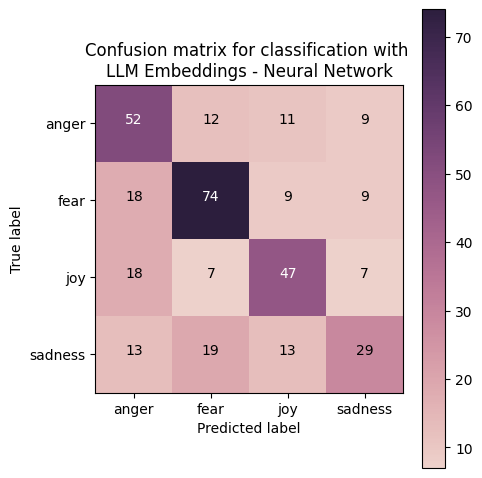

In [120]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm3, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - Neural Network')

### ** >>> Exercise 12 (Take home): **

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

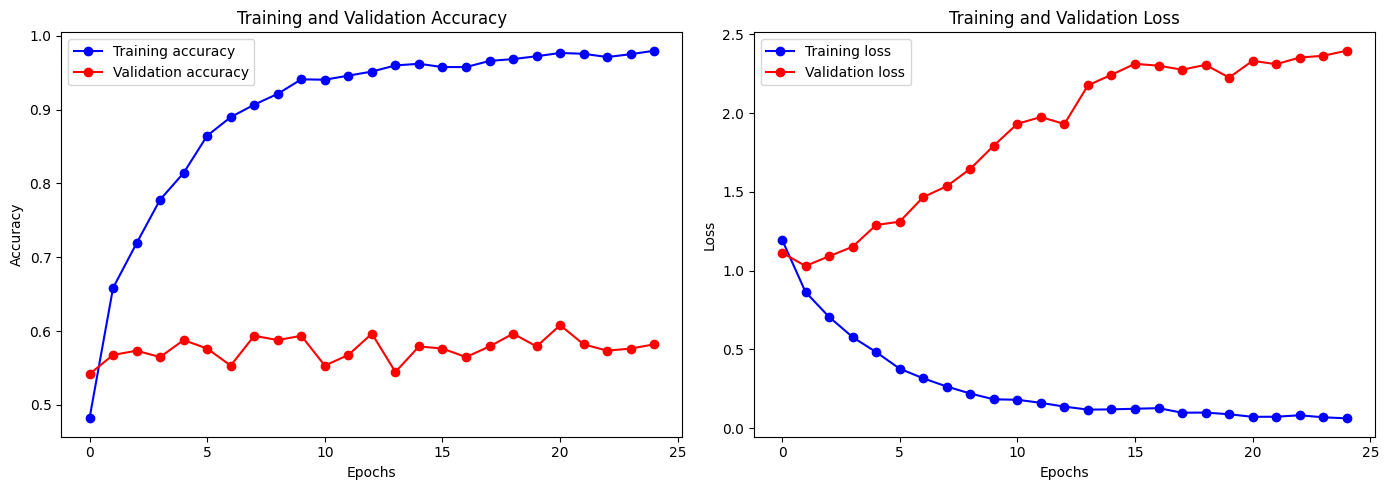

In [121]:
# Answer here
# Answer here
epochs = training_log['epoch']
train_acc = training_log['accuracy']
val_acc = training_log['val_accuracy']
train_loss = training_log['loss']
val_loss = training_log['val_loss']

# Plot accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### 10.5 Few-Shot Prompting Classification:
Few-shot prompting classification for LLMs involves giving the model a few labeled examples (typically 5 or fewer) within a prompt to guide it in performing a classification task. Instead of needing extensive training, the LLM uses these examples to understand the task and classify new inputs. This approach is significant in current research because it allows LLMs to perform well on tasks with minimal labeled data, reducing the need for large training datasets and making it highly flexible for various NLP tasks, including those in low-resource languages or niche domains.

In this lab exercise, we will explore zero-shot, 1-shot, and 5-shot prompting for classification using an LLM:

- Zero-shot means the model performs classification without seeing any examples beforehand.
- 1-shot provides the model with just one labeled example per class to guide its classification.
- 5-shot gives the model five labeled examples per class to improve its understanding of the task.

Since processing large datasets can be computationally demanding, we will only sample 20 test texts per emotion for the classification task, allowing us to test the model's performance more efficiently without using the entire test set.

**Process order: Explanation Prompt -> Examples + labels (if it is not zero-shot) -> Text to classify**

**Recommendation for the explanation prompt:** Explain to the model that it is a classification model of certain labels, and to only output the label word, and no other explanation. In this case if the model does not follow the instructions we are retrying the same text until it outputs one of the accepted labels for it.

In [122]:
import ollama
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting
model_ollama = "llama3.2"

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    """

    prompt = classification_instructions + "\n\n"

    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nEmotion: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base):
    valid_emotions = ['anger', 'fear', 'joy', 'sadness']
    response = None
    while not response or response not in valid_emotions:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nEmotion: " #The classification text will leave the emotion label to be filled in by the LLM
        result = ollama.chat(model=model_ollama, messages=[
            {'role': 'user', 'content': full_prompt}
        ])
        response = result['message']['content'].strip().lower()  # Clean and standardize the response
        if response not in valid_emotions:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots)
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # Prepare to classify the test set
    predictions = []
    true_labels = []
    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=test_samples)

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in test_samples[emotion].iterrows():
            test_text = test_row['text']
            predicted_emotion = classify_with_llm(test_text, prompt_base)
            predictions.append(predicted_emotion)
            true_labels.append(emotion)

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))

    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions)
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    


Invalid response: none. Asking for reclassification.
Invalid response: none. Asking for reclassification.
Invalid response: none. Asking for reclassification.
Invalid response: none. Asking for reclassification.
Invalid response: none. Asking for reclassification.
Invalid response: none. Asking for reclassification.
Invalid response: i can't classify that text as an emotion.. Asking for reclassification.
Invalid response: none. Asking for reclassification.
Invalid response: i cannot classify this text, as it appears to be a jumbled or encoded message. can i help you with something else?. Asking for reclassification.
Invalid response: none

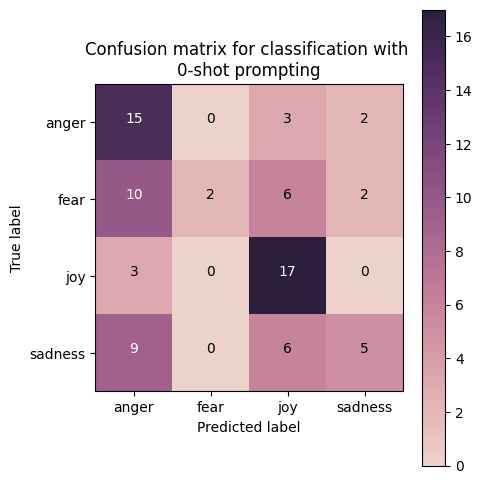

In [123]:
# Example of running the experiment with zero-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=0)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: Candace &amp; her pout are getting right on my tits #GBBO
Emotion: anger

Text: okay i AHVE to start mob psycho 100 today. if i dont im going to fight myself
Emotion: fear

Text: @BbeautifulSoul_ u always gotta attitude tho ... 😕 cheer up
Emotion: joy

Text: @happyandbashful Flirt, simper, pout, repeat. Yuck.
Emotion: sadness


Accuracy: 46.25%
              precision    recall  f1-score   support

       anger       0.40      0.70      0.51        20
        fear       1.00      0.05      0.10        20
         joy       0.44      0.75      0.56        20
     sadness       0.70      0.35      0.47        20

    accurac

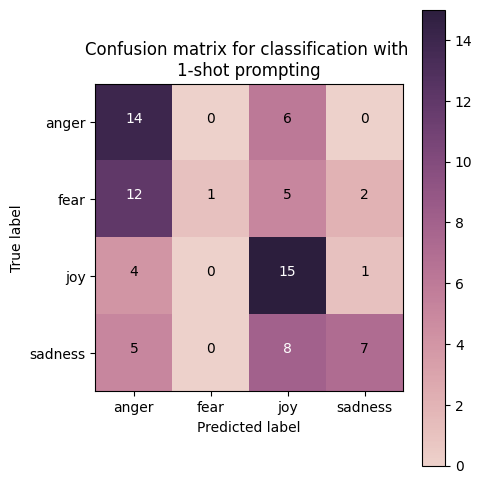

In [ ]:
# Example of running the experiment with 1-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=1)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: Candace &amp; her pout are getting right on my tits #GBBO
Emotion: anger

Text: @josephperson Cam is still rattled from the backlash he received when he made the black QB comment and suffered the wrath of White America.
Emotion: anger

Text: When someone rudely says all women should have long hair and your inner feminist tries not to rage
Emotion: anger

Text: SOMEONE LET SNAKES IN MY HOUSE, I BET IT @Ya_Boi_Huck I KILL THAT BUGGER WHEN I GET MY HANDS ON HIM #rage #HuckFP2
Emotion: anger

Text: Who got madden 17 or 2k17 ps4 add TrackdawgT lets run it
Emotion: anger

Text: okay i AHVE to start mob psycho 100 today. if i don

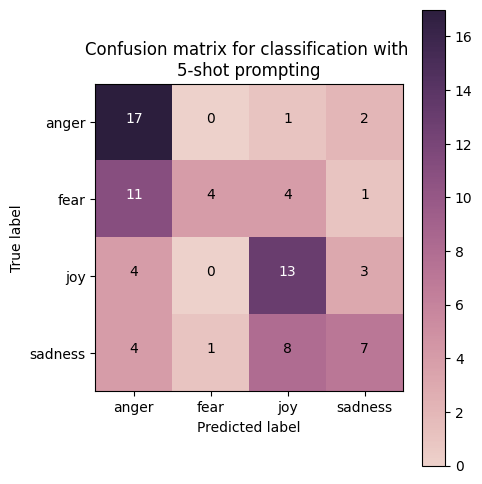

In [ ]:
# Example of running the experiment with 5-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=5)

### ** >>> Exercise 13 (Take home): **

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.

In [ ]:
# Answer here
# Compared with 0-shot, 1-shot and 5-shot classification, the overall accuracy is higher with more shots.

# An interesting thing is that the least confused emotion may differ in different shots.
# When there are 0-shots, the least confused emotion is "joy". When there are 1-shots, the least confused
# emotion is still "joy". However, when there are 5-shots, the least confused emotion is "anger".
# Therefore, we can know that if we alter the number of shots, the most accurate emotion may change.

# Another analysis is about the most confused emotion. The most confused emotions are all the same,
# which is the emotion "fear" is confused as "anger". However, we can see from the three charts that
# sometimes given the more shots may not have the better example. In the 0-shot example the confusion
# matrix in "fear" confused as "anger" is 10. In the 1-shot example, the confusion matrix in "fear"
# confused as "anger" is 12. In the 2-shot example, the confusion matrix in "fear" confused as "anger"
# is 11. It may be because the raise in the 1-shot example is not a true raise and result in the
# 5-shot drop. We may need to check the shots of 3-shot, 4-shot etc to find the best answer suitable.

# As for the emotion that is least recognized is "fear". It may be because the "fear" emotion may be
# combined with other emotions, so the model tends to check the most significant emotion. It may also
# be because that the model is not fully trained yet. It can because that the examples lead to some
# confusion to the model. It can also be we choose the bad examples that lead to the confusion.

### 10.6 Extra LLM Materials:
So this will be it for the lab, but here are some extra materials if you would like to explore:
- How to use Gemini's LLM API from Google: [Gemini Collab](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb?fbclid=IwZXh0bgNhZW0CMTEAAR0-gg7cDIuaGfkeN5U3rusSNKj2jj7bIsL45sZWaM0NbTE7BSNtfzBeEGE_aem_yT5wAuL_G5E21iuuCYJXwA#scrollTo=hskqSKnJUHvp) (Free with some restrictions to the requests per minute.

- How to use OpenAI ChatGPT model's API (Not Free API): [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

---